In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
%mkdir obj_detection

mkdir: cannot create directory ‘obj_detection’: File exists


In [4]:
%cd obj_detection

/content/drive/MyDrive/obj_detection


In [8]:
!curl -L "https://universe.roboflow.com/ds/z3uadUAq6c?key=KxCStefArf" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   3383      0 --:--:-- --:--:-- --:--:--  3395
100 11.5M  100 11.5M    0     0  11.4M      0  0:00:01  0:00:01 --:--:-- 17.2M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
 extracting: test/images/BloodImage_00038_jpg.rf.a14f8b6891460a5ca23057895050e396.jpg  
 extracting: test/images/BloodImage_00044_jpg.rf.00dd966c8bcfa16397678a6d3ae0184b.jpg  
 extracting: test/images/BloodImage_00062_jpg.rf.1b61a0fc3797571910f7feffb084e93e.jpg  
 extracting: test/images/BloodImage_00090_jpg.rf.1466d393cf887dd92021c69157410453.jpg  
 extracting: test/images/BloodImage_00099_jpg.rf.fefd41fc1e91d06936975812ca42404a.jpg  
 extracting: test/images/BloodImage_001

In [5]:
ds_yaml = open('data.yaml')
for l in ds_yaml.readlines():
  print(l)
ds_yaml.close()

train: ../train/images

val: ../valid/images

test: ../test/images



nc: 3

names: ['Platelets', 'RBC', 'WBC']



roboflow:

  workspace: alexeyvkozlov

  project: bccd-yolov5-riicm

  version: 2

  license: CC BY 4.0

  url: https://universe.roboflow.com/alexeyvkozlov/bccd-yolov5-riicm/dataset/2


In [10]:
!git clone https://github.com/ultralytics/yolov5
!pip install -U -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 17075 (delta 18), reused 5 (delta 5), pack-reused 17049 (from 3)
Receiving objects: 100% (17075/17075), 15.70 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.3/287.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 53.2 MB/s eta 0:00:00
   ━━━━

In [6]:
%cd yolov5

/content/drive/MyDrive/obj_detection/yolov5


In [7]:
import torch
from IPython.display import Image  # for displaying images

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=bbc401ee-703e-8973-fe3d-748699c6a41f, L2_cache_size=4MB)


In [8]:
%cp models/yolov5s.yaml models/blood_yolov5s.yaml

In [9]:
!pip install numpy==1.26.4
!pip install scipy==1.12.0
!pip install scikit-learn==1.2.2

In [10]:
%%time
!python train.py --img 416 --batch 16 --epochs 50 --data ../data.yaml --cfg models/blood_yolov5s.yaml --weights '' --name yolov5s_bc_100e  --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-19 07:32:24.449915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-19 07:32:24.483160: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-19 07:32:24.493213: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visua

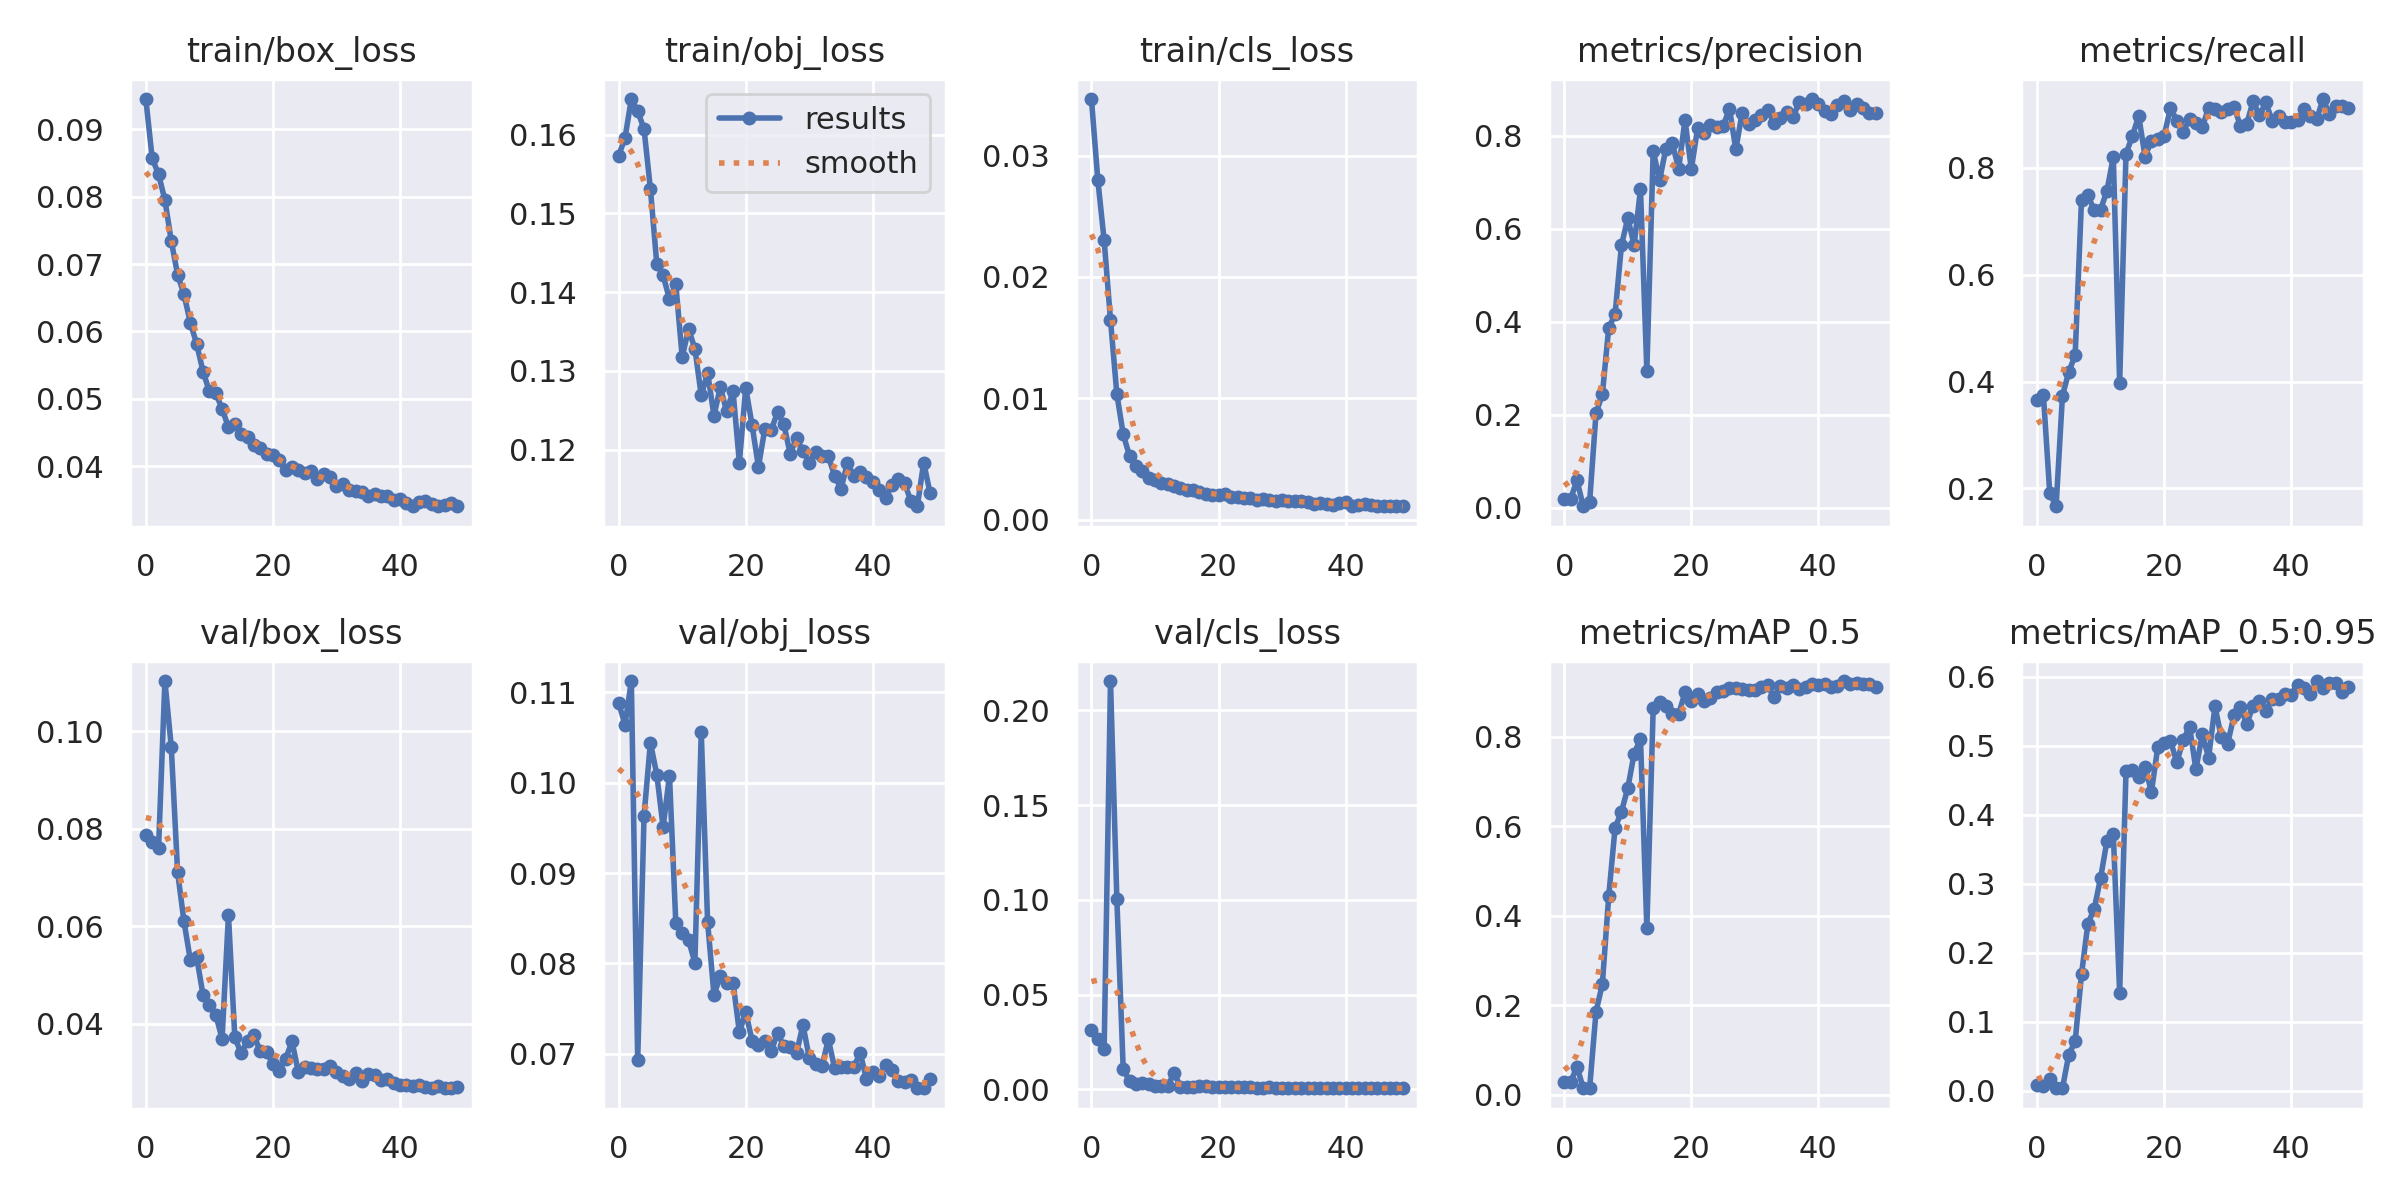

In [11]:
Image(filename='runs/train/yolov5s_bc_100e/results.png', width=1000)  # view results.png

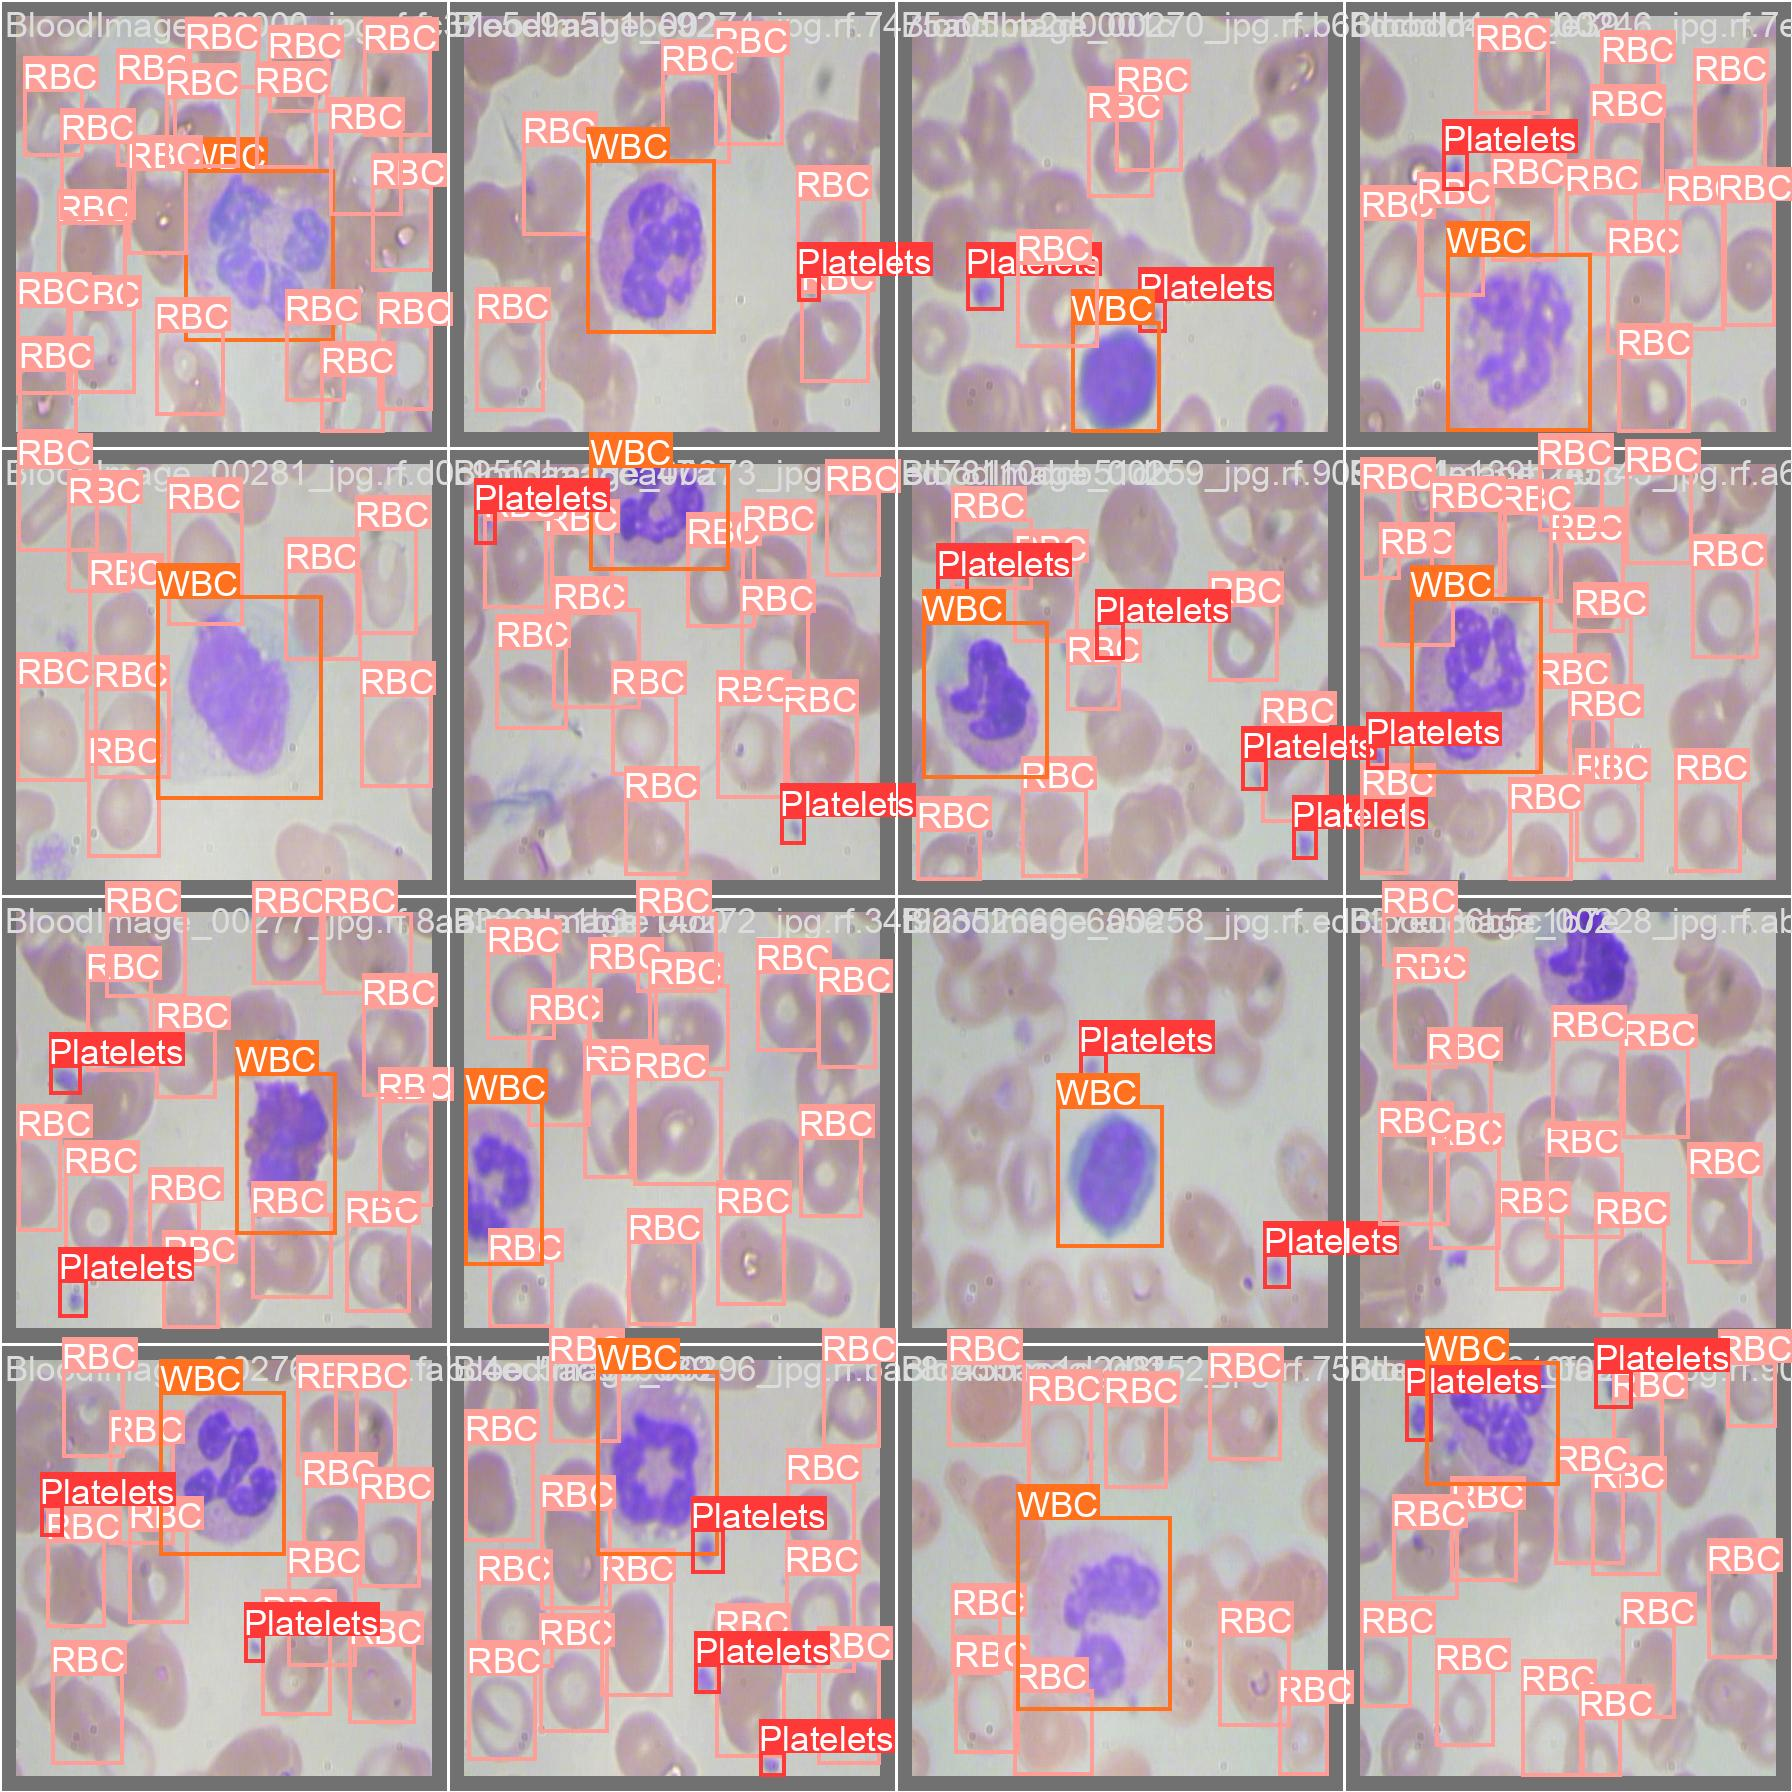

In [12]:
Image(filename='runs/train/yolov5s_bc_100e/val_batch0_labels.jpg', width=900)

In [20]:
!python detect.py --weights runs/train/yolov5s_bc_100e/weights/best.pt --img 640 --conf 0.6 --source /content/drive/MyDrive/obj_detection/img_test --name blood --save-txt --save-conf

detect: weights=['runs/train/yolov5s_bc_100e/weights/best.pt'], source=/content/drive/MyDrive/obj_detection/img_test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=blood, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
blood_YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/obj_detection/img_test/pJTq0KYYdDMC20Bsu9Qrgg_b.jpg: 448x640 52 RBCs, 6 WBCs, 42.0ms
Speed: 0.6ms pre-process, 42.0ms inference, 956.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to 

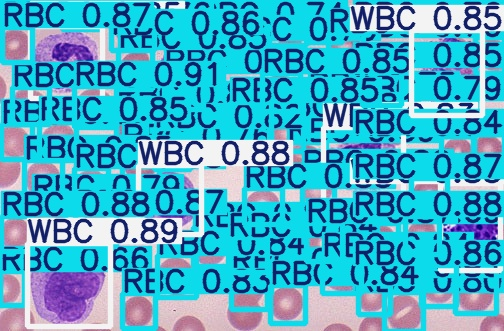

In [21]:
Image("runs/detect/blood4/1.jpg")